#### Importing libraries

In [74]:
# Import pyforest library, it contains: pandas, matplotlib, seaborn, numpy, sklearn...
import pyforest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading Data

In [75]:
# Loading the data from all the csv that we want to merge
df1 = pd.read_csv('csv/IT Salary Survey EU 2018.csv', sep=',')
df2 = pd.read_csv('csv/IT Salary Survey EU 2019.csv', sep=',')
df3 = pd.read_csv('csv/IT Salary Survey EU 2020.csv', sep=',')

In [76]:
# Defining the columns in Dataframe 1
df1.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Your level', 'Current Salary', 'Salary one year ago',
       'Salary two years ago', 'Are you getting any Stock Options?',
       'Main language at work', 'Company size', 'Company type'],
      dtype='object')

#### Data cleaning

In [77]:
# Dropping some columns that seem unnecessary in the data analysis
df1 = df1.drop(["Salary two years ago","Are you getting any Stock Options?", "Company size", "Company type"], axis=1)
df1.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Main language at work
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,Deutsch
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,Deutsch
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,Deutsch
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,English
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,English


In [78]:
# Rename the columns to a shorter version and which will be common to all the othr DataFrames
df1 = df1.rename(columns={"Years of experience": "YOE", "Your level": "Level", "Current Salary": "Salary", "Salary one year ago": "SOYA", "Main language at work": "Language"})
df1.head()

,Timestamp,Age,Gender,City,Position,YOE,Level,Salary,SOYA,Language
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,Deutsch
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,Deutsch
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,Deutsch
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,English
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,English


In [79]:
# Defining the columns in Dataframe 2
df2.columns

Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector', '0'],
      dtype='object')

In [80]:
# Dropping irrelevant columns
df2 = df2.drop(['Your main technology / programming language', 'Yearly bonus', 'Yearly stocks', 'Yearly bonus one year ago. Only answer if staying in same country', 'Yearly stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Number of home office days per month', 'Company name ', 'Company size', 'Company type', 'Сontract duration', 'Company business sector', '0'], axis=1)
df2.columns

Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Yearly brutto salary (without bonus and stocks)',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Main language at work'],
      dtype='object')

In [81]:
# Renaming the dataframe to as the Dataframe 1
df2 = df2.rename(columns={"Zeitstempel": "Timestamp", "Position (without seniority)": "Position", "Seniority level": "Level", "Years of experience": "YOE", "Yearly brutto salary (without bonus and stocks)": "Salary", "Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country": "SOYA", "Main language at work": "Language"})
df2.head()

,Timestamp,Age,Gender,City,Level,Position,YOE,Salary,SOYA,Language
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,64000.0,58000.0,English
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,55000.0,55000.0,English
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,70000.0,55000.0,English
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,63000.0,NaN,English
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,66000.0,56000.0,English


In [82]:
# Defining the columns in Dataframe 3
df3.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [83]:
# Dropping the irrelevant columns
df3 = df3.drop(['Years of experience in Germany', 'Your main technology / programming language', 'Other technologies/programming languages you use often', 'Yearly bonus + stocks in EUR', 'Annual bonus+stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Employment status', 'Сontract duration', 'Company size', 'Company type', 'Have you lost your job due to the coronavirus outbreak?', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'], axis=1)
df3.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Seniority level',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Main language at work'],
      dtype='object')

In [84]:
# Renaming the dataframe to as the Dataframe 1 and 2
df3 = df3.rename(columns={"Position ": "Position", "Total years of experience": "YOE", "Seniority level":"Level", "Yearly brutto salary (without bonus and stocks) in EUR": "Salary", "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country":"SOYA", "Main language at work": "Language"})
df3.head()

,Timestamp,Age,Gender,City,Position,YOE,Level,Salary,SOYA,Language
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,Senior,80000.0,75000.0,English
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,Senior,80000.0,82000.0,English
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,Lead,120000.0,100000.0,English
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,Junior,54000.0,NaN,English
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,Senior,62000.0,62000.0,English


In [85]:
# Changing the format of the Timestamp on Dataframe 2
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], format='%d.%m.%Y %H:%M:%S').dt.strftime('%d/%m/%Y %H:%M:%S')
df2.head()

,Timestamp,Age,Gender,City,Level,Position,YOE,Salary,SOYA,Language
0,02/12/2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,64000.0,58000.0,English
1,02/12/2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,55000.0,55000.0,English
2,02/12/2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,70000.0,55000.0,English
3,02/12/2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,63000.0,NaN,English
4,02/12/2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,66000.0,56000.0,English


In [86]:
# Replacing Values of Dataframe 1 in Gender column to match others
df1['Gender'] = df1['Gender'].replace({'M': 'Male'})
df1['Gender'] = df1['Gender'].replace({'F': 'Female'})
df1.head()

,Timestamp,Age,Gender,City,Position,YOE,Level,Salary,SOYA,Language
0,14/12/2018 12:41:33,43.0,Male,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,Deutsch
1,14/12/2018 12:42:09,33.0,Female,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,Deutsch
2,14/12/2018 12:47:36,32.0,Male,München,Software Engineer,10.0,Senior,88000.0,73000.0,Deutsch
3,14/12/2018 12:50:15,25.0,Male,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,English
4,14/12/2018 12:50:31,39.0,Male,München,UX Designer,10.0,Senior,69000.0,60000.0,English


In [87]:
# Merge the three Dataframes using concat method
df = pd.concat([df1, df2, df3], ignore_index=True, sort=False)
df.tail()

,Timestamp,Age,Gender,City,Position,YOE,Level,Salary,SOYA,Language
3002,18/01/2021 11:50:02,34.0,Male,Zurich,Software Engineer,7,Senior,108500.0,90000.0,English
3003,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,Senior,70000.0,70000.0,English
3004,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,60000.0,48000.0,English
3005,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,Lead,110000.0,90000.0,English
3006,19/01/2021 12:01:11,26.0,Male,Berlin,DevOps,2,Middle,65000.0,40000.0,English


In [88]:
# Defining the shape of the merged dataframe
df.shape

(3007, 10)

In [89]:
# Getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  3007 non-null   object 
 1   Age        2778 non-null   float64
 2   Gender     2983 non-null   object 
 3   City       2978 non-null   object 
 4   Position   2972 non-null   object 
 5   YOE        2958 non-null   object 
 6   Level      2958 non-null   object 
 7   Salary     2991 non-null   float64
 8   SOYA       2083 non-null   float64
 9   Language   2971 non-null   object 
dtypes: float64(3), object(7)
memory usage: 235.1+ KB


In [90]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 10)


In [91]:
# Finding null values
print(df.isnull().sum())

Timestamp      0
Age          229
Gender        24
City          29
Position      35
YOE           49
Level         49
Salary        16
SOYA         924
Language      36
dtype: int64


In [92]:
# Dropping missing values
df = df.dropna()
df.count()

Timestamp    1913
Age          1913
Gender       1913
City         1913
Position     1913
YOE          1913
Level        1913
Salary       1913
SOYA         1913
Language     1913
dtype: int64

In [93]:
# Writing the data frame to a csv file 
df.to_csv('csv/IT Salary Survey EU (2018 - 2020).csv')

#### Data Visualization

In [94]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'YOE', 'Level',
       'Salary', 'SOYA', 'Language'],
      dtype='object')

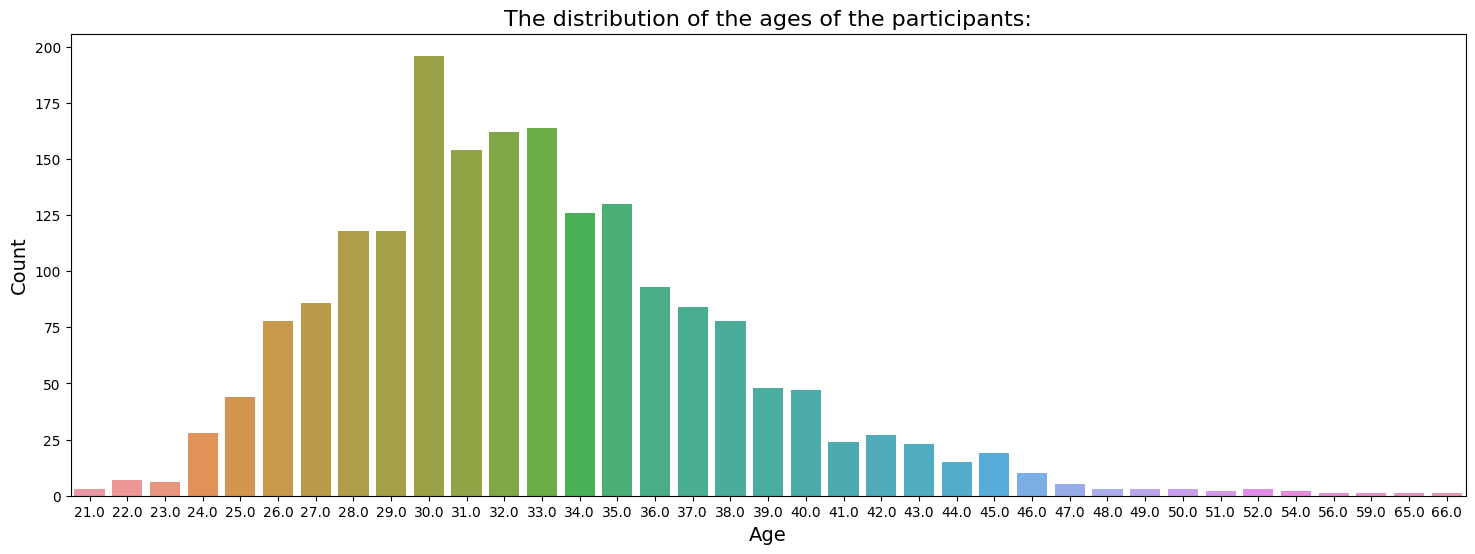

In [95]:
# Distribution of the ages
plt.figure(figsize=(18,6))
sns.countplot(data= df, x='Age')
plt.title('The distribution of the ages of the participants:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Count', fontsize = 14)
plt.show()


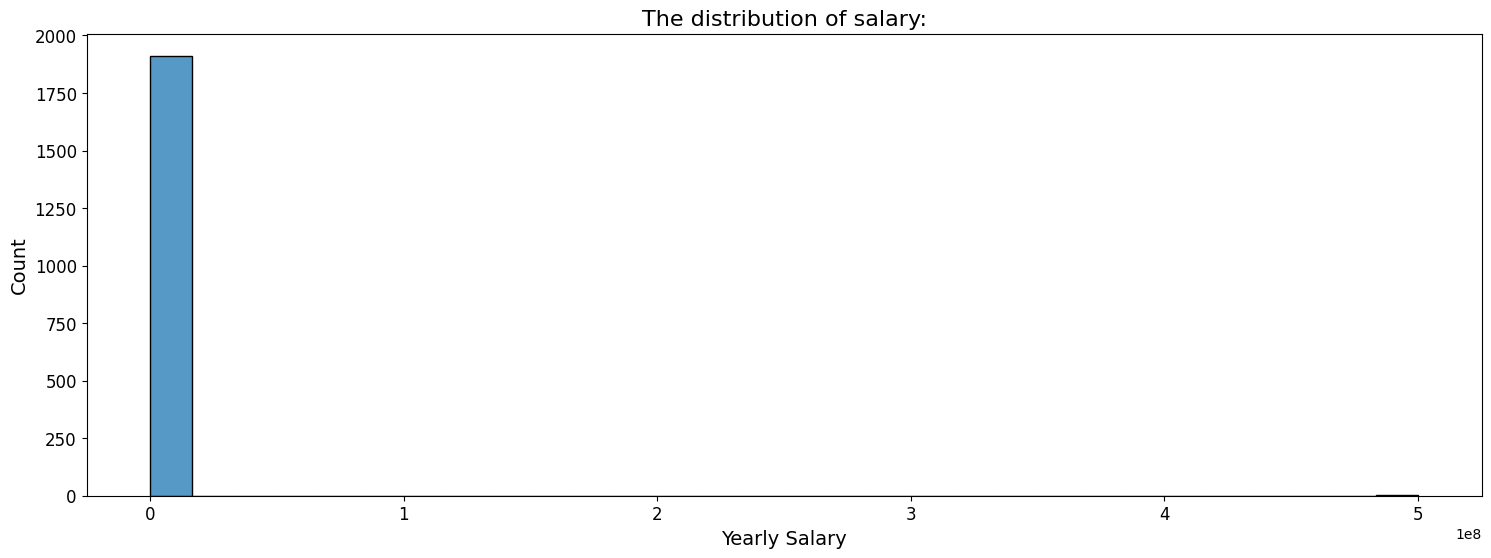

In [96]:
# Distribution of salary

plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Salary", bins=30)
plt.title('The distribution of salary:',fontsize= 16)
plt.xlabel('Yearly Salary', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize = 12)
plt.show()

C:\Users\Orioki\AppData\Local\Temp\ipykernel_13872\2086281723.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


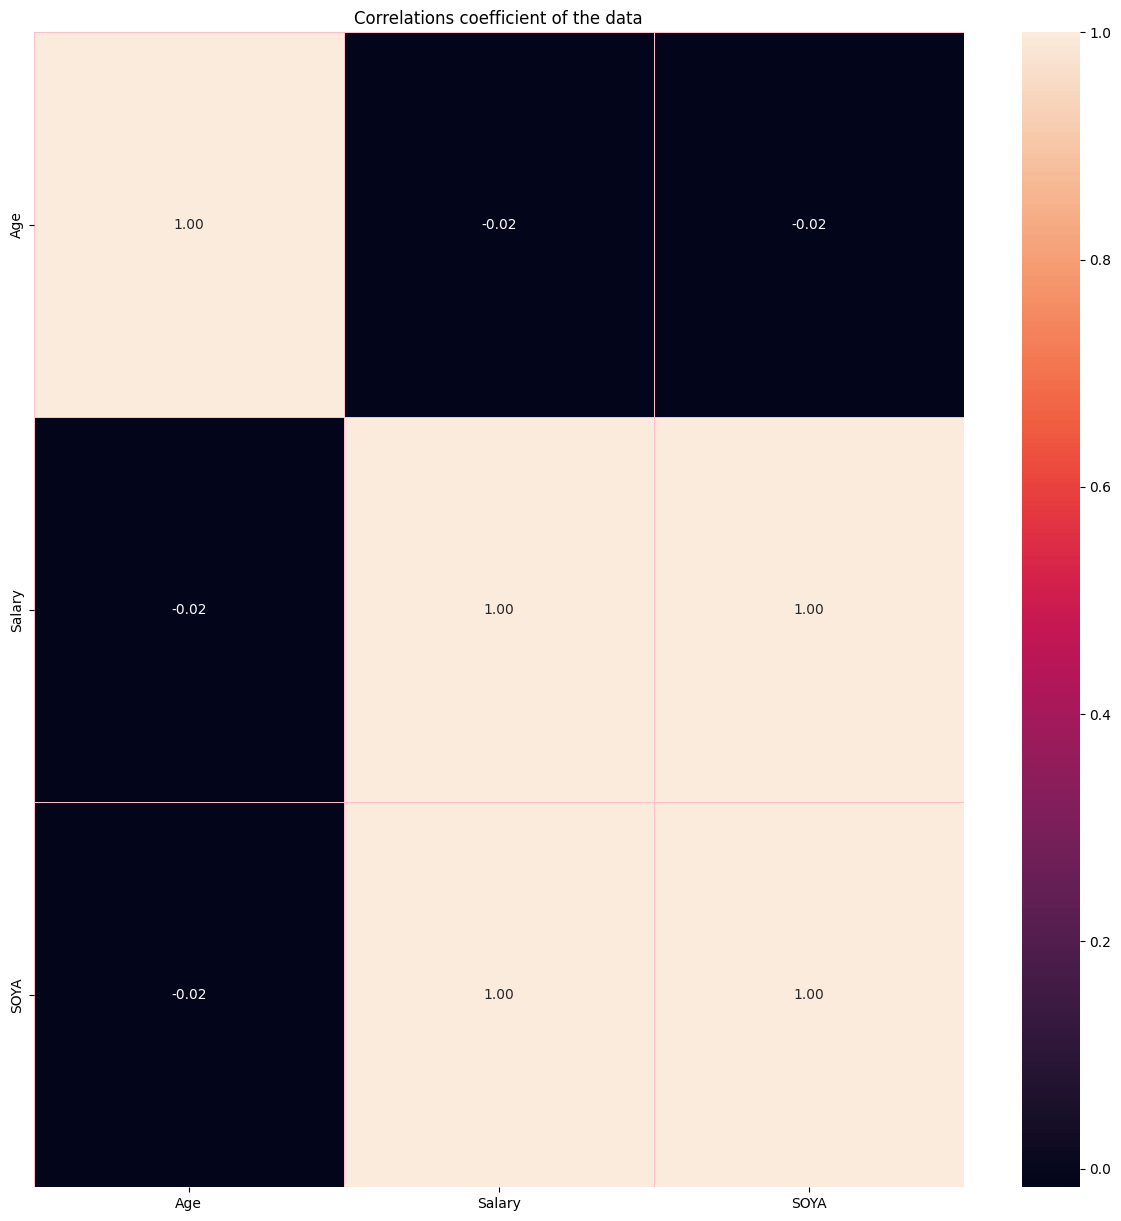

In [97]:
# Corelation coefficient 
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",linewidths=0.5,linecolor="pink")
plt.title('Correlations coefficient of the data')
plt.show()